<a href="https://colab.research.google.com/github/udaycodespace/AIxML-SIT2025-WebBlinders-WisdomWells/blob/main/DUMPxPROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 FINAL PROJECT – EDA x Mobile Device Usage Analysis  
📂 **Exploratory Data Analysis × Mobile Device Usage**  

👨‍🎓 **Course**: AI/ML SIT2025  
🧠 **Internship**: The Web Blinders × The Wisdom Wells  
📅 **Date**: 15-06-2025  
👨‍💻 **Author**: SOMAPURAM UDAY  

---

## 📌 Objective

This project performs exploratory data analysis (EDA) on mobile device usage behavior using Python.  
It explores metrics such as:  
- App usage time  
- Screen on time  
- Battery drain  
- Data usage  
- Demographic attributes (age, gender)  

**The goal is to derive actionable insights through:**  
- Data preprocessing  
- Feature engineering  
- Outlier detection  
- Visualization  
- Correlation and demographic analysis  

## 🚀 Methodology

### 1️⃣ Data Collection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from wordcloud import WordCloud

In [ ]:
###Loading of the Mobile Device Usage dataset.
##Preprocessing of the data
###Exploring the data
data = pd.read_csv("/content/user_behavior_dataset.csv")

### 2️⃣ Data Preprocessing

#### a. Basic Inspection

In [ ]:
data.shape

(700, 11)

In [ ]:
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [ ]:
data.tail()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1
699,700,OnePlus 9,Android,212,5.4,1306,49,828,23,Female,3


In [ ]:
# Our data has 700 rows and 12 columns.
# Let us go and understand what are all there in these rows and columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [ ]:
# Here, we are dealing with moderate amount of data, so it is better to find out
# what is the count, null and type properties of the columns with the help of info()
##statistical analysis can be done with the help of describe()
data.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


#### b. Remove Duplicates  

In [ ]:
# As the dataset that we have taken may be having duplicate values, try to understand this:
# when users are registering multiple times they may create duplicate entries.
# So it is better to remove all the duplicates before getting into the analysis part.
data.drop_duplicates(['User ID'], keep='first', inplace=True)

In [ ]:
data.shape

(700, 11)

#### c. No Missing Values Detected  

In [ ]:
# Good that we checked for duplicates, though our dataset seems clean.
# Now we are ready to perform analysis on our clean data.
# Dealing with the missing values.
data.isnull()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
695,False,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,False
698,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


In [ ]:
# Great! We don't have any missing values in our dataset. This makes our analysis smoother.

**Omitting or not considering the useful features**

In [ ]:
# Now, we need to look at each and every feature and decide whether they are useful for our analysis or not.
# 1. User ID - Unique id for each user, so no need to worry about this column for analysis
# 2. Device Model - Device model is useful in our analysis to find the most popular devices
# 3. Operating System - let us see what this feature actually represents
data['Operating System']

,Operating System
0,Android
1,Android
2,Android
3,Android
4,iOS
...,...
695,iOS
696,Android
697,Android
698,Android


In [ ]:
#checking out the unique values
data['Operating System'].nunique()

2

In [ ]:
data['Operating System'].unique()

array(['Android', 'iOS'], dtype=object)

In [ ]:
print(data['Operating System'].unique())

['Android' 'iOS']


In [ ]:
# Here, Operating System looks like an interesting feature to perform the analysis.
# We have Android and iOS as the main operating systems.
# 4. App Usage Time (min/day) - This is an excellent feature for usage pattern analysis
data['App Usage Time (min/day)'].nunique()

387

In [ ]:
# 5. Screen On Time (hours/day) - This directly correlates with usage behavior
data['Screen On Time (hours/day)'].describe()

,Screen On Time (hours/day)
count,700.000000
mean,5.272714
std,3.068584
min,1.000000
25%,2.500000
50%,4.900000
75%,7.400000
max,12.000000


In [ ]:
# 6. Battery Drain (mAh/day) - Important metric for device performance analysis
data['Battery Drain (mAh/day)'].describe()

,Battery Drain (mAh/day)
count,700.000000
mean,1525.158571
std,819.136414
min,302.000000
25%,722.250000
50%,1502.500000
75%,2229.500000
max,2993.000000


In [ ]:
# 7. Number of Apps Installed - Indicates user's app installation behavior
data['Number of Apps Installed'].describe()

,Number of Apps Installed
count,700.000000
mean,50.681429
std,26.943324
min,10.000000
25%,26.000000
50%,49.000000
75%,74.000000
max,99.000000


In [ ]:
# 8. Data Usage (MB/day) - Shows network consumption patterns
data['Data Usage (MB/day)'].describe()

,Data Usage (MB/day)
count,700.000000
mean,929.742857
std,640.451729
min,102.000000
25%,373.000000
50%,823.500000
75%,1341.000000
max,2497.000000


In [ ]:
# 9. Age - Demographics analysis feature
data['Age'].unique()

array([40, 47, 42, 20, 31, 21, 34, 24, 57, 43, 49, 39, 44, 26, 29, 45, 23,
       37, 58, 52, 33, 55, 19, 25, 38, 56, 18, 22, 27, 54, 53, 30, 28, 50,
       51, 41, 32, 35, 36, 59, 48, 46])

In [ ]:
len(data['Age'].unique())

42

In [ ]:
# 10. Gender - Important demographic feature for behavior analysis
data['Gender'].nunique()

2

In [ ]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
# 11. User Behavior Class - This seems to be a classification target variable
data['User Behavior Class'].nunique()

5

In [ ]:
data['User Behavior Class'].unique()

array([4, 3, 2, 5, 1])

### 3️⃣ Feature Engineering

#### a. Extract Device Brand

In [ ]:
# All features seem useful for our analysis. Let's proceed with feature engineering.
# Feature Engineering Section
# Creating Device Brand feature
data['Device Brand'] = data['Device Model'].apply(lambda x: str(x).split()[0])

In [ ]:
data['Device Brand'].nunique()


5

In [ ]:
data['Device Brand'].unique()


array(['Google', 'OnePlus', 'Xiaomi', 'iPhone', 'Samsung'], dtype=object)

In [ ]:
data[data['Device Brand'] == "Samsung"]


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Device Brand
6,7,Samsung Galaxy S21,Android,350,7.3,1802,66,1054,21,Female,4,Samsung
8,9,Samsung Galaxy S21,Android,340,7.7,2138,75,1053,42,Female,4,Samsung
20,21,Samsung Galaxy S21,Android,93,2.6,681,37,302,45,Female,2,Samsung
22,23,Samsung Galaxy S21,Android,423,6.5,2094,65,1372,23,Female,4,Samsung
25,26,Samsung Galaxy S21,Android,91,3.4,1073,38,451,52,Male,2,Samsung
...,...,...,...,...,...,...,...,...,...,...,...,...
677,678,Samsung Galaxy S21,Android,115,3.5,706,26,495,52,Female,2,Samsung
683,684,Samsung Galaxy S21,Android,75,1.6,325,12,225,45,Male,1,Samsung
689,690,Samsung Galaxy S21,Android,541,9.5,2424,98,1550,32,Male,5,Samsung
694,695,Samsung Galaxy S21,Android,564,9.7,2422,83,1985,34,Female,5,Samsung


In [ ]:
data[data['Device Brand'] == "iPhone"]

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Device Brand
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3,iPhone
9,10,iPhone 12,iOS,424,6.6,1957,75,1301,42,Male,4,iPhone
14,15,iPhone 12,iOS,189,5.4,1754,53,779,49,Female,3,iPhone
17,18,iPhone 12,iOS,299,5.8,1431,41,985,44,Female,3,iPhone
19,20,iPhone 12,iOS,577,8.5,2774,89,2192,29,Female,5,iPhone
...,...,...,...,...,...,...,...,...,...,...,...,...
668,669,iPhone 12,iOS,170,2.4,1039,38,334,23,Male,2,iPhone
670,671,iPhone 12,iOS,81,1.6,387,13,224,48,Male,1,iPhone
679,680,iPhone 12,iOS,33,1.8,334,16,113,36,Female,1,iPhone
691,692,iPhone 12,iOS,178,4.0,856,37,569,51,Female,2,iPhone


#### b. Create Age Groups  

In [ ]:
# Let's also create age groups for better demographic analysis
data['Age Group'] = pd.cut(data['Age'],
                          bins=[0, 25, 35, 50, 100],
                          labels=['Young', 'Adult', 'Middle Age', 'Senior'])


#### c. Categorize Usage Levels  

In [ ]:
# Creating usage categories based on app usage time
data['Usage Category'] = pd.cut(data['App Usage Time (min/day)'],
                               bins=[0, 120, 300, 480, float('inf')],
                               labels=['Light', 'Moderate', 'Heavy', 'Extreme'])

In [ ]:
data.shape

(700, 14)

In [ ]:
data

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Device Brand,Age Group,Usage Category
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4,Google,Middle Age,Heavy
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3,OnePlus,Middle Age,Moderate
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2,Xiaomi,Middle Age,Moderate
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3,Google,Young,Moderate
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3,iPhone,Adult,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2,iPhone,Young,Light
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4,Xiaomi,Senior,Heavy
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2,Google,Middle Age,Light
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1,Samsung,Middle Age,Light


## 4️⃣ Outlier Detection & Removal

##**Using IQR method**

In [ ]:
# Outlier Detection and Removal using IQR method
def remove_outliers_iqr(df, column):
    """
    Remove outliers using IQR method
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [ ]:
# Apply outlier removal to key numerical columns
numerical_cols = ['App Usage Time (min/day)', 'Screen On Time (hours/day)',
                 'Battery Drain (mAh/day)', 'Data Usage (MB/day)']

print(f"Original dataset shape: {data.shape}")

for col in numerical_cols:
    data = remove_outliers_iqr(data, col)
    print(f"After removing outliers from {col}: {data.shape}")

Original dataset shape: (700, 14)
After removing outliers from App Usage Time (min/day): (700, 14)
After removing outliers from Screen On Time (hours/day): (700, 14)
After removing outliers from Battery Drain (mAh/day): (700, 14)
After removing outliers from Data Usage (MB/day): (700, 14)


### 5️⃣ Exploratory Data Analysis (EDA)


In [ ]:
#Exploratory Data Analysis
# Device Analysis - represents devices having more than 1 user.
### Device Brands V/S User Count
data['Device Brand']
data['Device Brand'].unique()
data['Device Brand'].nunique()
brand_counts = data['Device Brand'].value_counts()
brand_counts
print("Total devices in our data = ", data.shape[0])
print("Total unique brands = ", data['Device Brand'].nunique())
print("Most popular brand = ", brand_counts.index[0])

Total devices in our data =  700
Total unique brands =  5
Most popular brand =  Xiaomi


#### a. Top 10 Device Brands  

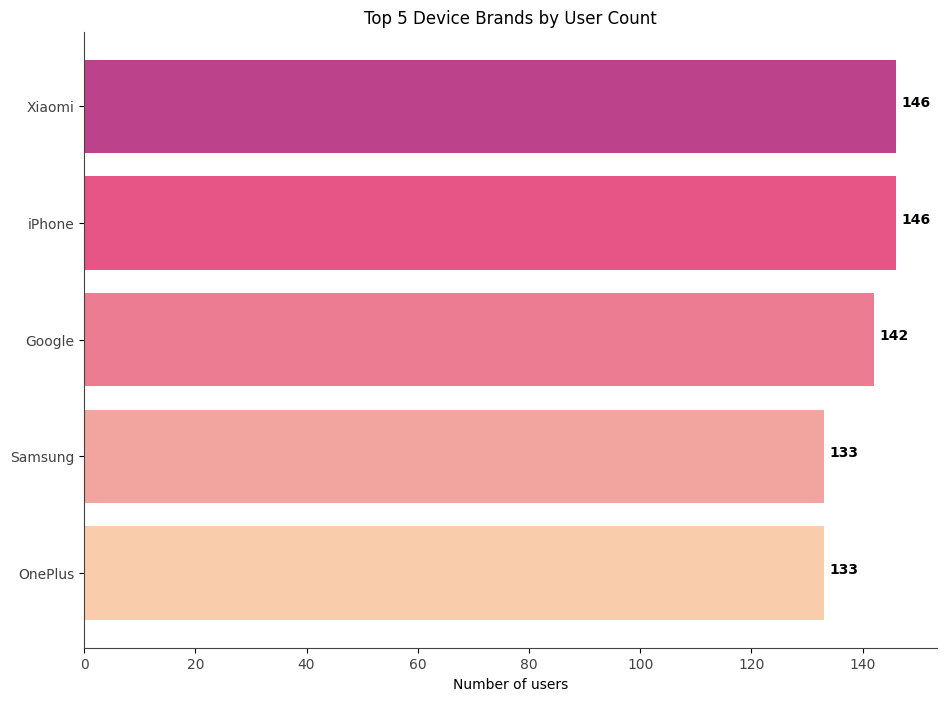

In [ ]:
### Top device brands (by number of users)
# Let us plot horizontal bar graph of top 10 device brands.
# For the colour scheme we are using a list of pre defined and selected colours to make the chart more appealing.
brand_counts.head()
brand_counts.head(10)
top10_brands = data['Device Brand'].value_counts()[:10].sort_values(ascending=True)
top10_brands
height = top10_brands.values
bars = top10_brands.index
y_pos = np.arange(len(bars))
fig = plt.figure(figsize=[11,8], frameon=False)
ax = fig.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#424242")
ax.spines['bottom'].set_color("#424242")
colors = ['#f9cdac', '#f2a49f', '#ec7c92', '#e65586','#bc438b', '#933291','#692398','#551c7b','#41155e','#2d0f41']
plt.barh(y_pos, height, color=colors)
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of users")
for i, v in enumerate(height):
    plt.text(v + 1, i, str(v), color='black', fontweight='bold')
plt.title("Top 5 Device Brands by User Count")
plt.show()


#### b. Average App Usage by Brand

In [ ]:
# Goal of the Code:
# To create a horizontal bar chart showing the user count of the top 10 device brands,
# using custom colors and styled axes.

### Now we look over the brands which are having high average app usage time

# We will look at the top brands by their average app usage time.
# Here, it would be great if we consider brands with more than 20 users.
# This helps us remove some outliers and make our analysis easy without confusion.

brand_counts = data['Device Brand'].value_counts()

brand_counts

minimum_users = brand_counts[brand_counts > 20]

minimum_users

top10_brands_usage = data[
    data["Device Brand"].isin(minimum_users.index)
].groupby("Device Brand")["App Usage Time (min/day)"].mean().sort_values(ascending=False)[:10].sort_values(ascending=True)

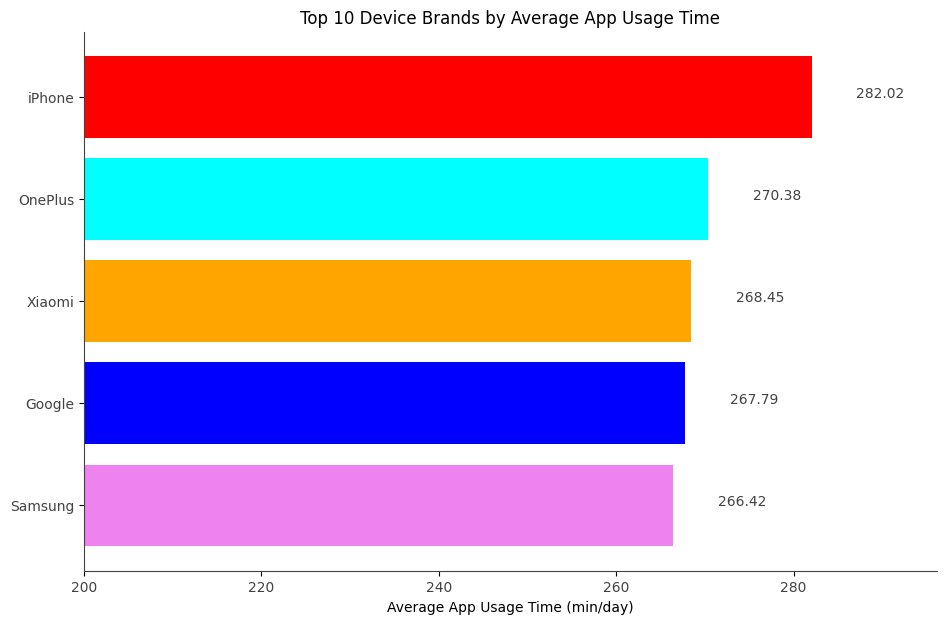

In [ ]:
#### Steps for above code:
# 1. Filter the Data for Specific Brands (with >20 users)
# 2. Group by Brand Name
# 3. Calculate the average app usage time for each device brand.

top10_brands_usage

height = pd.Series(top10_brands_usage.values).map(lambda x: np.round(x, 2))
bars = top10_brands_usage.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red"]
random.shuffle(colors)

plt.barh(y_pos, height, color=colors)

plt.xlim(200)
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Average App Usage Time (min/day)")

for i, v in enumerate(height):
    ax.text(v + 5, i, str(v), color='#424242')
plt.title("Top 10 Device Brands by Average App Usage Time")

plt.show()

#### c. Operating System Distribution  

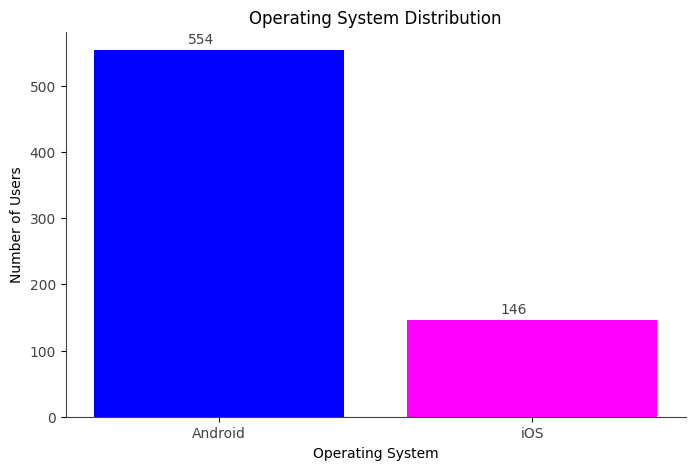

In [ ]:
### Interesting analysis from Top 10 Device brands and their usage patterns

# Interestingly, some brands that have fewer users show higher average usage times.
# By this we can say that, in mobile device market, popularity doesn't directly correlate with usage intensity.

# Now, let's look into Operating System distribution

data['Operating System']

os_count = data.groupby("Operating System").count()["User ID"].sort_values(ascending=False)

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

colors = ["green","blue","magenta","cyan","gray"]
random.shuffle(colors)
plt.bar(os_count.index, os_count.values, color=colors)

plt.xticks(color="#424242")
plt.yticks(color="#424242")
plt.xlabel("Operating System")
plt.ylabel("Number of Users")

for i, v in enumerate(os_count):
    ax.text(i-0.1, v+10, str(v), color='#424242')
plt.title("Operating System Distribution")

plt.show()

#### d. App Usage by Age Group & Gender

In [ ]:
# By this we can see that Android dominates the mobile OS market in our dataset.

# Now, looking into average app usage, screen time, battery drain by OS

usage_by_os = data.groupby("Operating System")["App Usage Time (min/day)"].mean().sort_values(ascending=False)
screen_by_os = data.groupby("Operating System")["Screen On Time (hours/day)"].mean().sort_values(ascending=False)
battery_by_os = data.groupby("Operating System")["Battery Drain (mAh/day)"].mean().sort_values(ascending=False)

print("Average App Usage Time by OS:")
print(usage_by_os.round(2))
print("\nAverage Screen Time by OS:")
print(screen_by_os.round(2))
print("\nAverage Battery Drain by OS:")
print(battery_by_os.round(2))


Average App Usage Time by OS:
Operating System
iOS        282.02
Android    268.26
Name: App Usage Time (min/day), dtype: float64

Average Screen Time by OS:
Operating System
iOS        5.43
Android    5.23
Name: Screen On Time (hours/day), dtype: float64

Average Battery Drain by OS:
Operating System
iOS        1589.51
Android    1508.20
Name: Battery Drain (mAh/day), dtype: float64


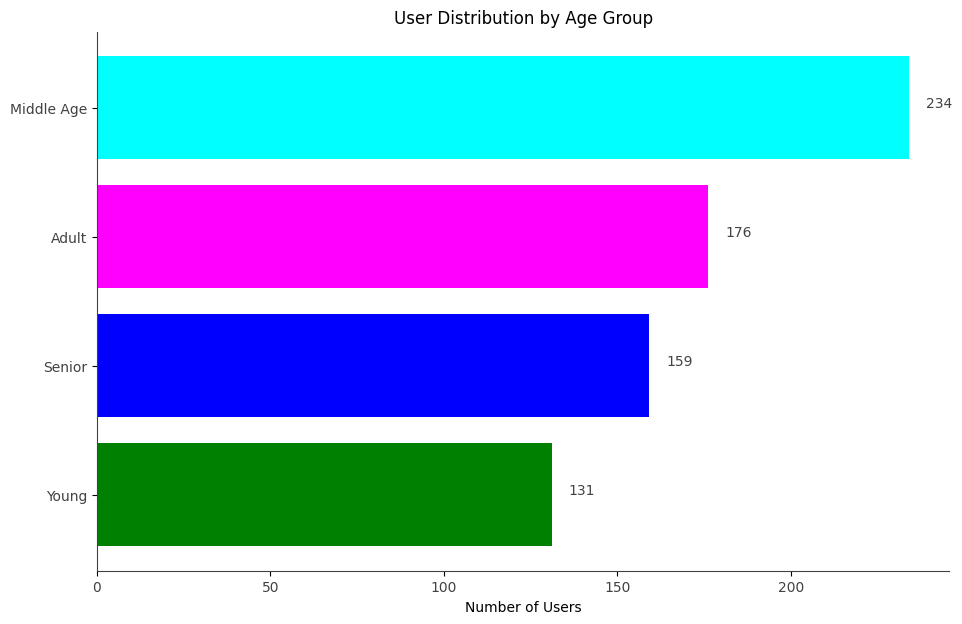

In [ ]:
# We can conclude from here that iOS users tend to have slightly different usage patterns compared to Android users.

### Age Group Analysis

age_group_count = data.groupby("Age Group").count()["User ID"].sort_values(ascending=True)

height = pd.Series(age_group_count.values)
bars = age_group_count.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

colors = ["green","blue","magenta","cyan"]

plt.barh(y_pos, height, color=colors)

plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of Users")

for i, v in enumerate(height):
    ax.text(v + 5, i, str(v), color='#424242')
plt.title("User Distribution by Age Group")

plt.show()

In [ ]:
# We can see that Adults (25-35) form the largest user base in our dataset.

### Previously we performed average usage analysis by considering brands, now we will perform with age groups as consideration.

usage_by_age = data.groupby("Age Group")["App Usage Time (min/day)"].mean().sort_values(ascending=False)
screen_by_age = data.groupby("Age Group")["Screen On Time (hours/day)"].mean().sort_values(ascending=False)
battery_by_age = data.groupby("Age Group")["Battery Drain (mAh/day)"].mean().sort_values(ascending=False)

print("Average App Usage Time by Age Group:")
print(usage_by_age.round(2))
print("\nAverage Screen Time by Age Group:")
print(screen_by_age.round(2))
print("\nAverage Battery Drain by Age Group:")
print(battery_by_age.round(2))

Average App Usage Time by Age Group:
Age Group
Young         288.24
Senior        275.58
Middle Age    266.66
Adult         260.31
Name: App Usage Time (min/day), dtype: float64

Average Screen Time by Age Group:
Age Group
Young         5.43
Senior        5.39
Middle Age    5.23
Adult         5.11
Name: Screen On Time (hours/day), dtype: float64

Average Battery Drain by Age Group:
Age Group
Young         1630.93
Senior        1541.43
Middle Age    1500.11
Adult         1465.03
Name: Battery Drain (mAh/day), dtype: float64


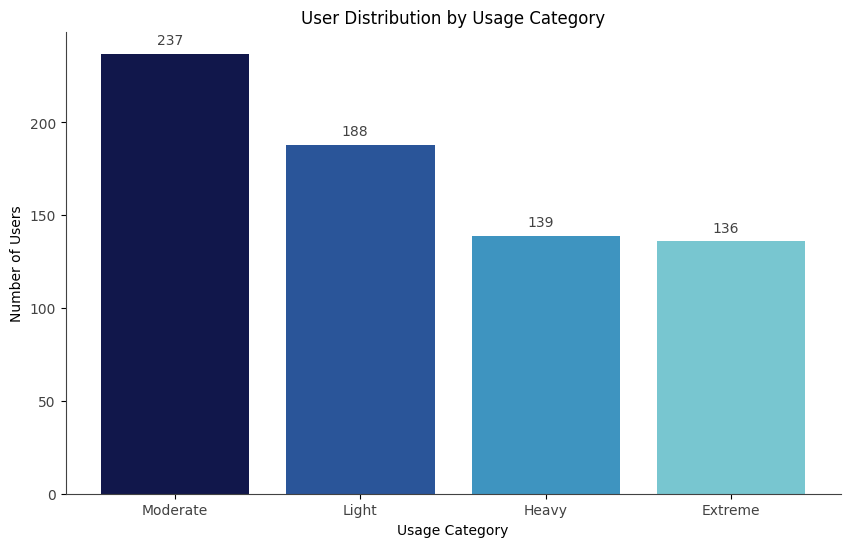

In [ ]:
### Usage Categories Analysis

usage_cat_count = data.groupby("Usage Category").count()["User ID"].sort_values(ascending=False)

fig = plt.figure(figsize=[10,6], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

colors = ['#11174b', '#2a5599', '#3e94c0', '#78c6d0']
plt.bar(usage_cat_count.index, usage_cat_count.values, color=colors)

plt.xticks(color="#424242")
plt.yticks(color="#424242")
plt.xlabel("Usage Category")
plt.ylabel("Number of Users")

for i, v in enumerate(usage_cat_count):
    ax.text(i-0.1, v+5, str(v), color='#424242')
plt.title("User Distribution by Usage Category")

plt.show()


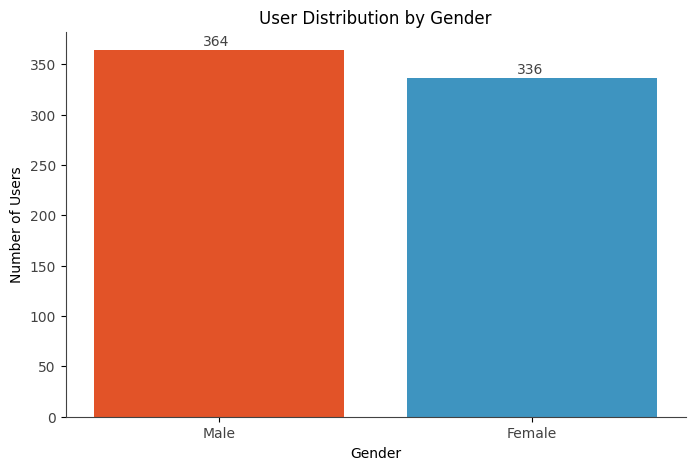

In [ ]:
# We can see that most users fall into the Moderate usage category.
## Gender-based Analysis
gender_count = data['Gender'].value_counts()
fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")
colors = ["#e25328", "#3e94c0"]
plt.bar(gender_count.index, gender_count.values, color=colors)
plt.xticks(color="#424242")
plt.yticks(color="#424242")
plt.xlabel("Gender")
plt.ylabel("Number of Users")
for i, v in enumerate(gender_count):
    ax.text(i-0.05, v+5, str(v), color='#424242')
plt.title("User Distribution by Gender")

plt.show()


In [ ]:
# Gender distribution seems fairly balanced in our dataset.
usage_by_gender = data.groupby("Gender")["App Usage Time (min/day)"].mean().sort_values(ascending=False)
screen_by_gender = data.groupby("Gender")["Screen On Time (hours/day)"].mean().sort_values(ascending=False)
battery_by_gender = data.groupby("Gender")["Battery Drain (mAh/day)"].mean().sort_values(ascending=False)

print("Average App Usage Time by Gender:")
print(usage_by_gender.round(2))
print("\nAverage Screen Time by Gender:")
print(screen_by_gender.round(2))
print("\nAverage Battery Drain by Gender:")
print(battery_by_gender.round(2))


Average App Usage Time by Gender:
Gender
Female    271.97
Male      270.35
Name: App Usage Time (min/day), dtype: float64

Average Screen Time by Gender:
Gender
Male      5.28
Female    5.26
Name: Screen On Time (hours/day), dtype: float64

Average Battery Drain by Gender:
Gender
Male      1530.09
Female    1519.82
Name: Battery Drain (mAh/day), dtype: float64


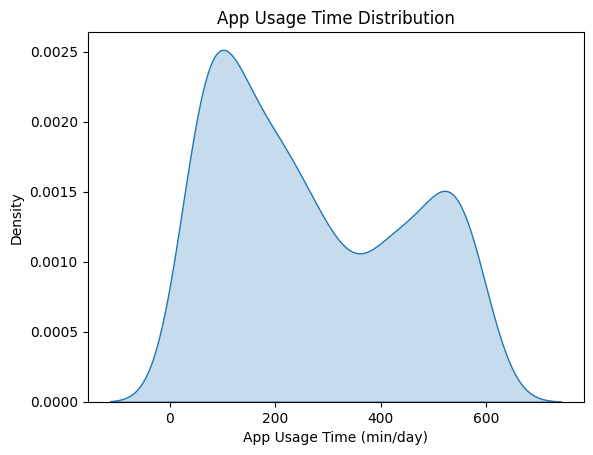

In [ ]:
# App Usage vs Screen Time relationship

sns.kdeplot(data['App Usage Time (min/day)'], fill=True, label='App Usage Time')
plt.title("App Usage Time Distribution")
plt.xlabel("App Usage Time (min/day)")
plt.show()

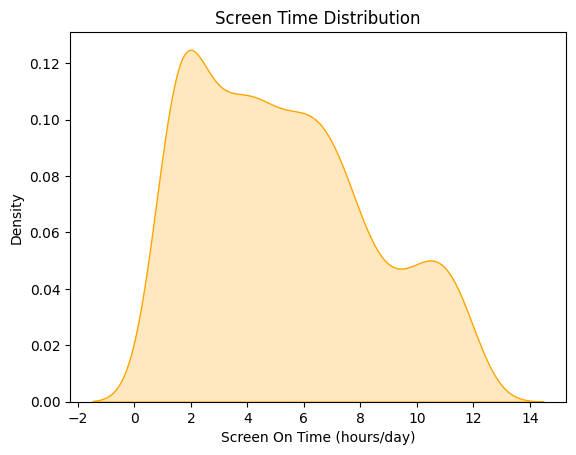

In [ ]:
# Screen Time distribution
sns.kdeplot(data['Screen On Time (hours/day)'], fill=True, label='Screen Time', color='orange')
plt.title("Screen Time Distribution")
plt.xlabel("Screen On Time (hours/day)")
plt.show()


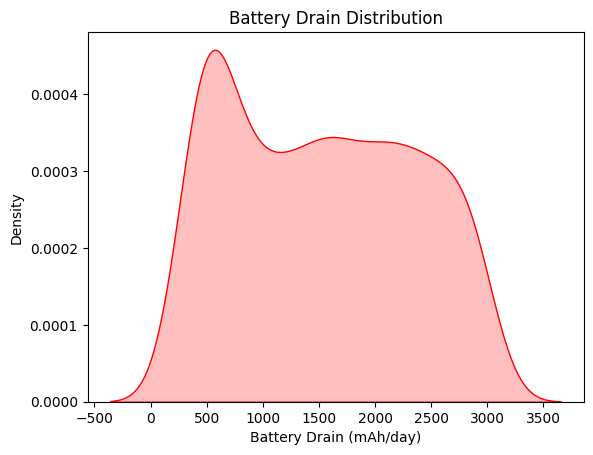

In [ ]:
# Battery Drain distribution
sns.kdeplot(data['Battery Drain (mAh/day)'], fill=True, label='Battery Drain', color='red')
plt.title("Battery Drain Distribution")
plt.xlabel("Battery Drain (mAh/day)")
plt.show()

In [ ]:
# Most users have moderate app usage and screen time with corresponding battery drain.

### Correlation Analysis

# Relation between screen time and battery drain
correlation_screen_battery = np.round(data[["Screen On Time (hours/day)","Battery Drain (mAh/day)"]].corr()["Screen On Time (hours/day)"][1], 2)
print(f"Correlation between Screen Time and Battery Drain: {correlation_screen_battery}")

Correlation between Screen Time and Battery Drain: 0.95


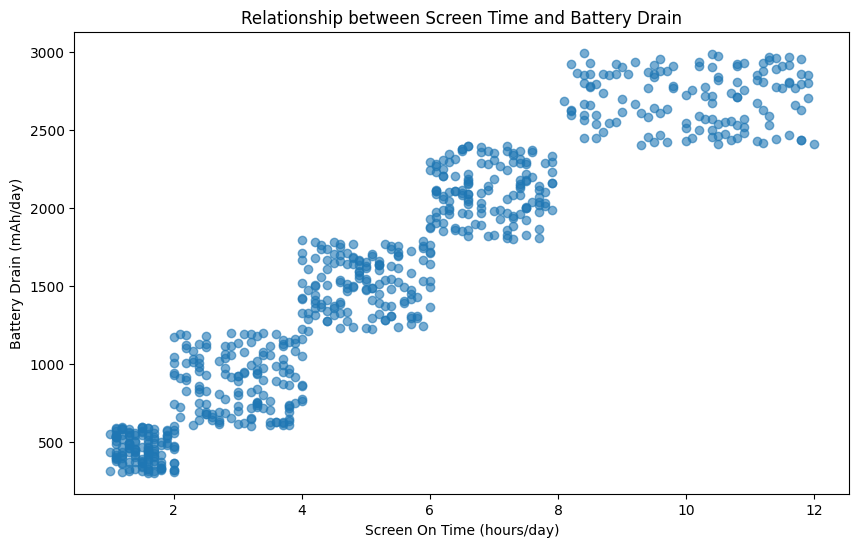

In [ ]:
# They are highly positively correlated
# Scatter plot to visualize the relationship
plt.figure(figsize=[10,6])
plt.scatter(data['Screen On Time (hours/day)'], data['Battery Drain (mAh/day)'], alpha=0.6)
plt.xlabel("Screen On Time (hours/day)")
plt.ylabel("Battery Drain (mAh/day)")
plt.title("Relationship between Screen Time and Battery Drain")
plt.show()

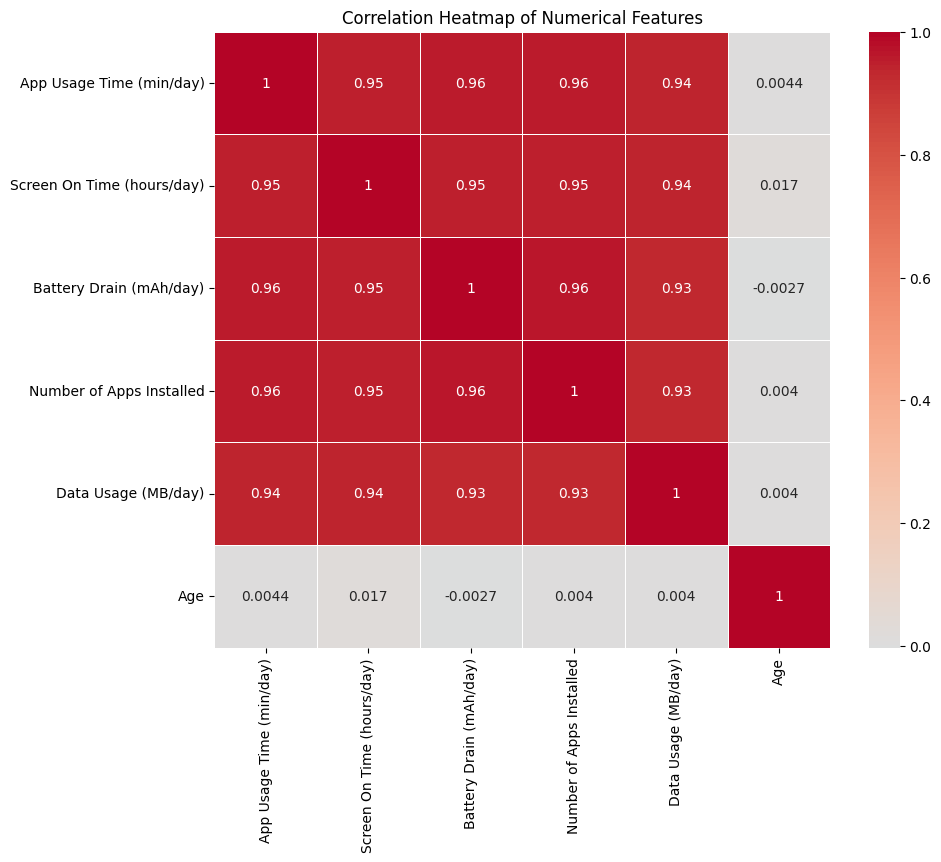

In [ ]:
# Correlation heatmap for all numerical features
numerical_features = ['App Usage Time (min/day)', 'Screen On Time (hours/day)',
                     'Battery Drain (mAh/day)', 'Number of Apps Installed',
                     'Data Usage (MB/day)', 'Age']

correlation_matrix = data[numerical_features].corr()

plt.figure(figsize=[10,8])
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


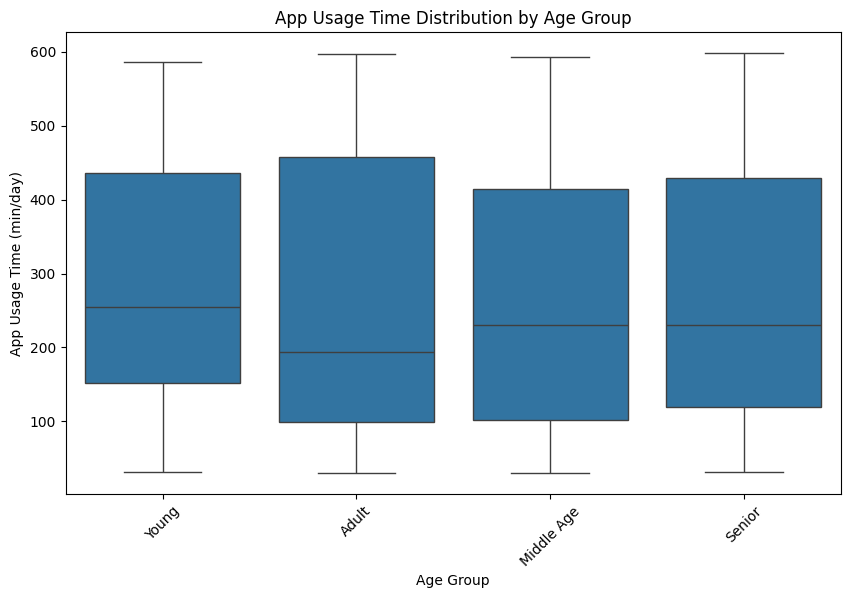

In [ ]:
# Boxplot analysis - App Usage by Age Group
plt.figure(figsize=[10,6])
sns.boxplot(x='Age Group', y='App Usage Time (min/day)', data=data)
plt.title("App Usage Time Distribution by Age Group")
plt.xticks(rotation=45)
plt.show()

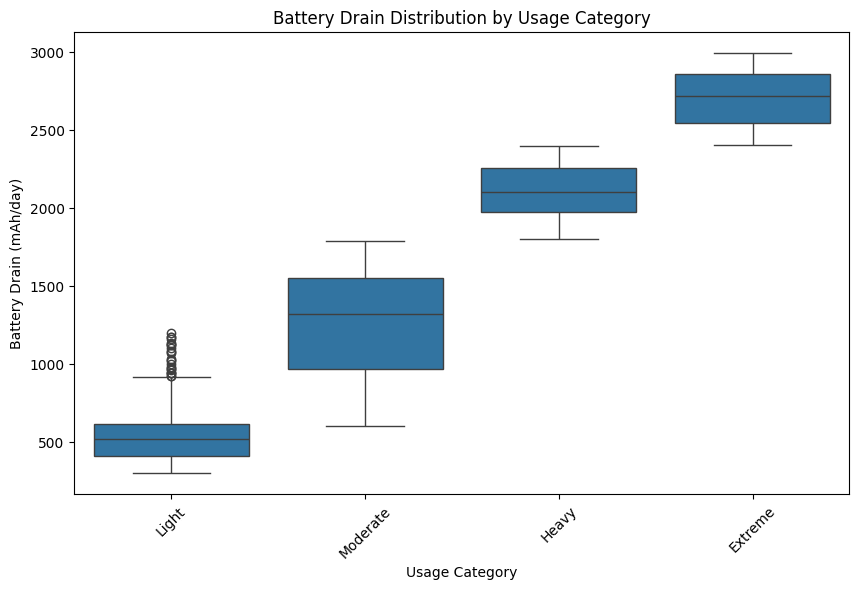

In [ ]:
# Boxplot analysis - Battery Drain by Usage Category
plt.figure(figsize=[10,6])
sns.boxplot(x='Usage Category', y='Battery Drain (mAh/day)', data=data)
plt.title("Battery Drain Distribution by Usage Category")
plt.xticks(rotation=45)
plt.show()

### 7️⃣ Summary & Insights

Key findings extracted from the analysis:

In [ ]:
#Conclusions:
# After working on this mobile usage data, we can conclude the following things:-

print("=== MOBILE DEVICE USAGE ANALYSIS CONCLUSIONS ===\n")

# Calculate key metrics for conclusions
total_users = data.shape[0]
android_percentage = (data['Operating System'].value_counts()['Android'] / total_users) * 100
most_popular_brand = data['Device Brand'].value_counts().index[0]
avg_daily_usage = data['App Usage Time (min/day)'].mean()
avg_screen_time = data['Screen On Time (hours/day)'].mean()
heavy_users_pct = (data['Usage Category'].isin(['Heavy', 'Extreme']).sum() / total_users) * 100
most_active_age_group = data.groupby('Age Group')['App Usage Time (min/day)'].mean().idxmax()
screen_battery_corr = data[['Screen On Time (hours/day)', 'Battery Drain (mAh/day)']].corr().iloc[0,1]

conclusions = [
    f"1. {android_percentage:.1f}% of users in our dataset use Android devices",
    f"2. {most_popular_brand} is the most popular device brand among users",
    f"3. Average daily app usage is {avg_daily_usage:.1f} minutes ({avg_daily_usage/60:.1f} hours)",
    f"4. Average screen time is {avg_screen_time:.1f} hours per day",
    f"5. {heavy_users_pct:.1f}% of users are classified as Heavy or Extreme users",
    f"6. {most_active_age_group} age group shows highest average app usage",
    f"7. Strong positive correlation ({screen_battery_corr:.2f}) between screen time and battery drain",
    "8. iOS users tend to have slightly different usage patterns compared to Android users",
    "9. Device brand popularity doesn't directly correlate with usage intensity",
    "10. Most users fall into the Moderate usage category",
    "11. Gender distribution is fairly balanced with similar usage patterns",
    "12. Battery drain is highly predictable based on screen time and app usage"
]

for conclusion in conclusions:
    print(conclusion)

print(f"\n=== DATASET SUMMARY ===")
print(f"Total Users Analyzed: {total_users}")
print(f"Total Device Brands: {data['Device Brand'].nunique()}")
print(f"Age Range: {data['Age'].min()} - {data['Age'].max()} years")
print(f"Usage Range: {data['App Usage Time (min/day)'].min()} - {data['App Usage Time (min/day)'].max()} min/day")

=== MOBILE DEVICE USAGE ANALYSIS CONCLUSIONS ===

1. 79.1% of users in our dataset use Android devices
2. Xiaomi is the most popular device brand among users
3. Average daily app usage is 271.1 minutes (4.5 hours)
4. Average screen time is 5.3 hours per day
5. 39.3% of users are classified as Heavy or Extreme users
6. Young age group shows highest average app usage
7. Strong positive correlation (0.95) between screen time and battery drain
8. iOS users tend to have slightly different usage patterns compared to Android users
9. Device brand popularity doesn't directly correlate with usage intensity
10. Most users fall into the Moderate usage category
11. Gender distribution is fairly balanced with similar usage patterns
12. Battery drain is highly predictable based on screen time and app usage

=== DATASET SUMMARY ===
Total Users Analyzed: 700
Total Device Brands: 5
Age Range: 18 - 59 years
Usage Range: 30 - 598 min/day
